In [4]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.cm import get_cmap
import matplotlib.animation as animation
import os

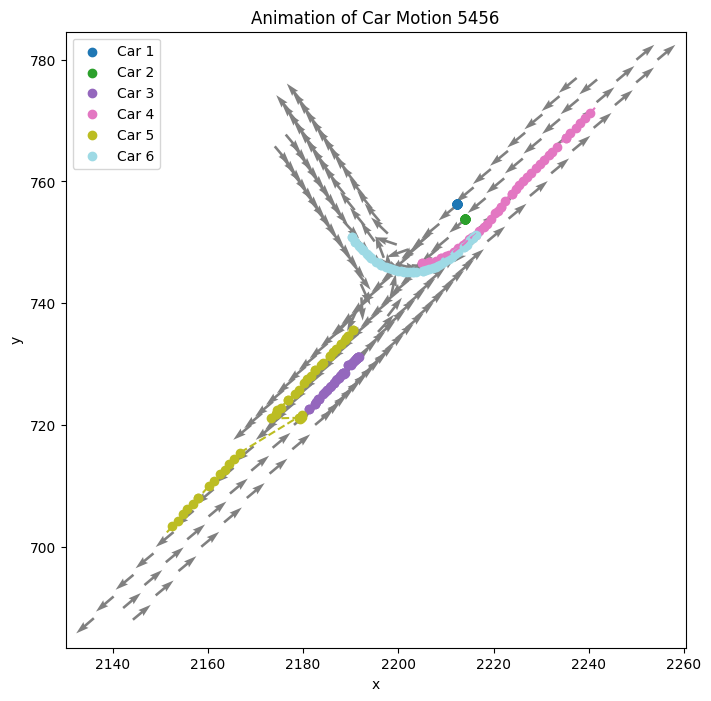

In [5]:
folder = train_path = "./train/train"
file_name = '5456'

with open(os.path.join(folder, file_name + '.pkl'), 'rb') as f:
    data = pickle.load(f)

lane_points = data['lane']
directions = data['lane_norm']
num_cars = data['car_mask'].astype(int).sum()
if 'p_out' in data:
    car_points = np.concatenate((data['p_in'], data['p_out']), axis=1)
else:
    car_points = data['p_in']
car_points = car_points[:num_cars, ...]
frames = car_points.shape[1]

directions_norm = directions / np.linalg.norm(directions, axis=1, keepdims=True)
avg_mag = np.mean(np.linalg.norm(directions, axis=1))
arrow_scale = avg_mag / 15

color_map = get_cmap('tab20')
car_colors = [color_map(i) for i in np.linspace(0, 1, num_cars)]

fig, ax = plt.subplots(figsize=(8, 8))
ax.quiver(lane_points[:,0], lane_points[:,1], directions_norm[:,0], directions_norm[:,1], scale=arrow_scale, units='xy', color='grey')

car_scatters = [ax.scatter(car_points[i,:,0], car_points[i,:,1], color=car_colors[i], label='Car {}'.format(i+1)) for i in range(num_cars)]
car_trajectories = [ax.add_line(Line2D([], [], color=car_colors[i], linestyle='--')) for i in range(num_cars)]

def update(frame):
    # Update the x and y data for each scatter plot and Line2D object
    scatter_x_data = [car_points[i,:frame,0] for i in range(num_cars)]
    scatter_y_data = [car_points[i,:frame,1] for i in range(num_cars)]
    line_x_data = [car_points[i,:,0] for i in range(num_cars)]
    line_y_data = [car_points[i,:,1] for i in range(num_cars)]

    # Set the updated x and y data for each scatter plot and Line2D object
    for i in range(num_cars):
        car_scatters[i].set_offsets(np.column_stack((scatter_x_data[i], scatter_y_data[i])))
        car_trajectories[i].set_data(line_x_data[i], line_y_data[i])

    # Return the updated scatter plots and Line2D objects
    return tuple(car_scatters)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Animation of Car Motion ' + file_name)

ax.legend()

ani = animation.FuncAnimation(fig, update, frames=frames, blit=True)
writer = animation.PillowWriter(fps=15, bitrate=1800)
ani.save(folder + '-' + file_name + '.gif', writer=writer)

# Display the animation
plt.show()